# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/111abiHt33Q-SV48pBPhEgDCZDI5KshnF?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Информация о звонках `Headliner`](https://drive.google.com/file/d/13mUHwvx79O4P-AucRdjBYkN5ha8LnCSp/view?usp=sharing)
*   [`Headliner_new_df.pkl` Информация о новых звонках `Headliner`](https://drive.google.com/file/d/1-Q1BxLbot7svY5hiqOquHRFvSOcwtpKS/view?usp=sharing)

*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/13pmGEYacsEHjYsIsYgf6fg4MUHAw509y/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-Ke1q42th_NV0og0e01_-mvJ8HL8JzfS/view?usp=sharing)
*   [`Headliner_transcriptions_df` Файлы транскрибации записей звонков `Headliner`](https://drive.google.com/file/d/1ThU49xWSv3T-HK61jRykOR3UDvOVeO4i/view?usp=sharing)
*   [`Headliner_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Headliner`](https://drive.google.com/file/d/1-BSmmymyVo8VYyvDXsO1ybXldOJ5eUaH/view?usp=sharing)

*   [`Headliner_all_df.pkl` Информация о всех звонках `Headliner`](https://drive.google.com/file/d/1857LwaVtJ364yFMpXemILSuVu84YEPPw/view?usp=sharing)
*   [`Headliner_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Headliner`](https://drive.google.com/file/d/1-HOWuSAngv9dXYiMlyRXX0kmVVAAT4sV/view?usp=sharing)
*   [`Headliner_targets_df.pkl` Целевые звонки `Headliner`](https://drive.google.com/file/d/1-J1gcgb2mrNDx3R_3l12kq0htS8PTkSv/view?usp=sharing)
*   [`Headliner_not_targets_df.pkl` Нецелевые звонки `Headliner`](https://drive.google.com/file/d/1dGf3UrVeQg0VfFhBL_lZfm-gaczPYBnL/view?usp=sharing)
*   [`Headliner_moot_df.pkl` Спорные звонки `Headliner`](https://drive.google.com/file/d/1-7vtN8vJNWgWfY8JE8bqoRXkUpvRE_og/view?usp=sharing)

*   [`Headliner_targets_train_df.pkl` Целевые звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1mXwujIDOQ_wbP68pl60mEkPVm6dYJf9Y/view?usp=sharing)
*   [`Headliner_not_targets_train_df.pkl` Нецелевые звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1-CvhJxwCVooN5_OcXUJAl519m76JOvbN/view?usp=sharing)
*   [`Headliner_moot_train_df.pkl` Спорные звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1-KwRSk9Jrf5Get1dwFvHECmb26QDdhRa/view?usp=sharing)

*   [`Headliner_targets_test_df.pkl` Целевые звонки `Headliner` для тестовой выборки](https://drive.google.com/file/d/1-3bxOkIwEoSAXNjzE7wjZ8AhM4Z1-xfN/view?usp=sharing)
*   [`Headliner_not_targets_test_df.pkl` Нецелевые звонки `Headliner`для тестовой выборки](https://drive.google.com/file/d/1-DAv-KEY8APguoXgIgaonsb1fQ4rrMag/view?usp=sharing)
*   [`Headliner_moot_test_df.pkl` Спорные звонки `Headliner`для тестовой выборки](https://drive.google.com/file/d/1-Q-VwKTqoPZohQxBCZRFL-BvZXB7SJhc/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Информация о звонках `Primavera`](https://drive.google.com/file/d/1-3csPnjIJXviKJzvbpCfOm29nBgl8L4Q/view?usp=sharing)
*   [`Primavera_new_df.pkl` Информация о новых звонках `Primavera`](https://drive.google.com/file/d/1-QmWkabU2_cyrXPeVaiHSt2e6sLuiCtp/view?usp=sharing)

*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-CLRfPyaGSc61OopNuFRlWTG-CBCaM1F/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-Lxa0KifMiByareL94rdEzEpvvMj4D1T/view?usp=sharing)
*   [`Primavera_transcriptions_df` Файлы транскрибации записей звонков `Primavera`](https://drive.google.com/file/d/1-21AcHmdkRhKmL0uwWOJ0jHyY8sj1tME/view?usp=sharing)
*   [`Primavera_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Primavera`](https://drive.google.com/file/d/1-BtSBVH2JXol5JDA0GKV4NOIz5WUnUd5/view?usp=sharing)

*   [`Primavera_all_df.pkl` Информация о всех звонках `Primavera`](https://drive.google.com/file/d/1-2-RlxkKHj5e6RkvbrN7_vs1h5aVXJFk/view?usp=sharing)
*   [`Primavera_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Primavera`](https://drive.google.com/file/d/1-INI9JsU9jsOkPDiGMKhftt18KXgF6-K/view?usp=sharing)
*   [`Primavera_targets_df.pkl` Целевые звонки `Primavera`](https://drive.google.com/file/d/1-JVtM9fOr6XoM7MVxkoVsYfwdZ6GQ--i/view?usp=sharing)
*   [`Primavera_not_targets_df.pkl` Нецелевые звонки `Primavera`](https://drive.google.com/file/d/1-KwG8M-0wEn-5C4ta-B8_xYGCXDOhpnH/view?usp=sharing)

*   [`Primavera_targets_train_df.pkl` Целевые звонки `Primavera` для обучающей выборки](https://drive.google.com/file/d/1WY910LSwTDTf_m7vtFk3z9FqXao0FhZX/view?usp=sharing)
*   [`Primavera_not_targets_train_df.pkl` Нецелевые звонки `Primavera` для обучающей выборки](https://drive.google.com/file/d/1-5TvmSizrXJHNXnfdbBafq8CjG65AiMG/view?usp=sharing)

*   [`Primavera_targets_test_df.pkl` Целевые звонки `Primavera` для тестовой выборки](https://drive.google.com/file/d/1-4s9BrHxpT_fzyXe4E03_GqGIFPZf9Io/view?usp=sharing)
*   [`Primavera_not_targets_test_df.pkl` Нецелевые звонки `Primavera`для тестовой выборки](https://drive.google.com/file/d/1-EOHhmMQ7SFhS51_rIh7UCwm68W18twC/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-99dLkSvU3wdwjkGJpwpYUXQjxx8dwEu/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-D6LlCFXQBMHceujvnq9H8rlx2jAnzmT/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Информация о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Rtw9a1no3mKatUjc_FNv_bgUBdNrs_d/view?usp=sharing)

*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-JevsfOpxzLNZmSs34qrswhGzhPwf69S/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-ODEeFLv15DN5bfLlwyrTx8D3yxydhP9/view?usp=sharing)
*   [`Paveletskaya_city_transcriptions_df` Файлы транскрибации записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-2kqmIGIraP70ekXB6LBqNjwaTnoxyk5/view?usp=sharing)
*   [`Paveletskaya_city_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-EfA8ZCpGNQk__puhiv1FuxoZC0rXxpj/view?usp=sharing)

*   [`Paveletskaya_city_all_df.pkl` Информация о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Cy78DqRZ3sbIHkg25wzVWPL-lST5oQa/view?usp=sharing)
*   [`Paveletskaya_city_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-J1BoALFH4-HRdVXjnkyr-fExmtQpUc7/view?usp=sharing)
*   [`Paveletskaya_city_targets_df.pkl` Целевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-MrjnBHDj65CEjJxLfPnp-hq07V_wtZK/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_df.pkl` Нецелевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-WCCyYaorHkBYoh5ugNsCkD7cb1PKH6D/view?usp=sharing)

*   [`Paveletskaya_city_targets_train_df.pkl` Целевые звонки `Paveletskaya_city` для обучающей выборки](https://drive.google.com/file/d/1-E_xfQcc9vaGxEJSiUeiEp5fbxn-1bxZ/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_train_df.pkl` Нецелевые звонки `Paveletskaya_city` для обучающей выборки](https://drive.google.com/file/d/1-XqcAK06ppsTLagZGpeXX96e2yhDt-iz/view?usp=sharing)

*   [`Paveletskaya_city_targets_test_df.pkl` Целевые звонки `Paveletskaya_city` для тестовой выборки](https://drive.google.com/file/d/1-VUl5bcPpEoEsQfyEQZyYy_ESrbx-sR1/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_test_df.pkl` Нецелевые звонки `Paveletskaya_city`для тестовой выборки](https://drive.google.com/file/d/1-dCaZZ2NtvODY2KWwsEgwUOhdqD0Szkv/view?usp=sharing)

## Сводные датафреймы

*   [`total_df.pkl` Сводный датафрейм с информацией о всех звонках](https://drive.google.com/file/d/15ijhw62sp2JNH6pryqZtM5akQHUnsTzi/view?usp=sharing)
*   [`total_work_df.pkl` Сводный рабочий датафрейм с информацией о всех звонках](https://drive.google.com/file/d/1-056tLrjP5yRQW8yRtwutvXs3zmPulW7/view?usp=sharing)

*   [`train_df.pkl` Обучающая выборка](https://drive.google.com/file/d/1-nipawwiXKNPeMIE2nxlAOZCVK_5N89B/view?usp=sharing)
*   [`test_df.pkl` Тестовая выборка](https://drive.google.com/file/d/1-sLBh5rMAhVI7ps68eiSMEVfwjB7PNdT/view?usp=sharing)

# 8 неделя

In [1]:
!rm -r sample_data

In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [43]:
import os                       # для работы с операционной системой
import pickle            as pkl # для сохранения и загрузки переменных
import pandas            as pd  # для работы с таблицами
import numpy             as np  # для работы с массивами
import matplotlib.pyplot as plt # для прорисовки и визуализации
import re                       # для работы с регулярными выражениями
import itertools                # для работы с итерируемыми объектами

from sklearn.model_selection             import train_test_split                                                # для разделения данных на обучающую и тестовую выборки
from sklearn.metrics                     import confusion_matrix, ConfusionMatrixDisplay, classification_report # для тестирования моделей

from tensorflow.keras.preprocessing.text import Tokenizer                          # токенайзер
from tensorflow.keras.models             import Sequential                         # класс-конструктор последовательной модели нейронной сети
from tensorflow.keras.layers             import Dense, Dropout, BatchNormalization # слои
from tensorflow.keras.optimizers         import Adam                               # оптимизатор
from tensorflow.keras.callbacks          import ModelCheckpoint                    # коллбэк
from tensorflow.keras.utils              import plot_model                         # для отрисовки архитектуры нейронной сети
from tensorflow.keras.saving             import load_model                         # для загрузки моделей

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                 # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                          # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                             # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                              # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                             # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                      # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'                # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'                # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'                # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'             # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                        # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                     # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                       # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'             # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                       # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                     # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                       # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'       # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv'  # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv'  # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'               # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                 # путь к информации о новых звонках проекта Paveletskaya_city
preprocessed_data_path     = my_drv_path           + 'media108.ru/Предобработанные данные/' # путь к предобработанным данным и подготовленным выборкам

## Подготовка текстовых выборок

In [4]:
# Загрузка train_df
with open(df_path + 'train_df.pkl', 'rb') as f:
  train_df = pkl.load(f)

# Загрузка test_df
with open(df_path + 'test_df.pkl', 'rb') as f:
  test_df = pkl.load(f)

In [5]:
# Перемешиваем данные
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df  = test_df.sample(frac=1).reset_index(drop=True)

In [6]:
# Сохраняем train_df в pkl
with open(df_path + 'train_df.pkl', 'wb') as f:
  pkl.dump(train_df, f)

# Сохраняем test_df в pkl
with open(df_path + 'test_df.pkl', 'wb') as f:
  pkl.dump(test_df, f)

In [7]:
# Классы
CLASS_LIST = ['Нецелевой', 'Целевой']
train_df['Класс'] = train_df['Класс'].apply(lambda x: 1 if x == 'Целевой' else 0)
test_df['Класс']  = test_df['Класс'].apply(lambda x: 1 if x == 'Целевой' else 0)
y_train = train_df['Класс'].values
y_test = test_df['Класс'].values
print('y_train.shape:', y_train.shape)
print(y_train[:20])
print()
print('y_test.shape:', y_test.shape)
print(y_test[:20])

y_train.shape: (6233,)
[0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0]

y_test.shape: (691,)
[1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1]


In [8]:
# Предобработка текстов whisper-транскрибации записей звонков
train_df['Текст whisper-транскрибации записи звонка'] = train_df['Текст whisper-транскрибации записи звонка'].apply(lambda s: re.sub('[^А-Яа-я0-9 ]', '', s.lower()))
train_df['Текст whisper-транскрибации записи звонка'] = train_df['Текст whisper-транскрибации записи звонка'].apply(lambda s: s.strip())
train_df['Текст whisper-транскрибации записи звонка'] = np.where(train_df['Текст whisper-транскрибации записи звонка'].str.len() < 5, 'безответа', train_df['Текст whisper-транскрибации записи звонка'])
train_df['Текст whisper-транскрибации записи звонка'] = train_df['Текст whisper-транскрибации записи звонка'].str.replace('ё', 'е', regex=False)

In [9]:
# Объём словаря для токенайзера
VOCAB_SIZE = 35000

# Токенайзер
tokenizer = Tokenizer(num_words=VOCAB_SIZE,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True,
                      split=' ',
                      oov_token='неизвестное_слово',
                      char_level=False)

# Получаем словарь частотности
tokenizer.fit_on_texts(train_df['Текст whisper-транскрибации записи звонка'].tolist())

In [10]:
# Сохраняем tokenizer в pkl
with open(preprocessed_data_path + 'tokenizer.pkl', 'wb') as f:
  pkl.dump(tokenizer, f)

In [11]:
# Максимальный индекс токенизации
max(tokenizer.word_index.values())

63038

In [12]:
# Словарь частотности
dict(itertools.islice(tokenizer.word_counts.items(), 50))

{'клубный': 1955,
 'город': 2683,
 'на': 33530,
 'веке': 6,
 'примар': 1,
 'государственный': 13,
 'реке': 2749,
 'примавера': 2220,
 'нин': 7,
 'здравствуйте': 10004,
 'ой': 314,
 'ошиблась': 22,
 'добрый': 4665,
 'вечер': 455,
 'ольга': 812,
 'открыть': 75,
 'пожалуйста': 8941,
 'у': 28878,
 'вас': 21443,
 'что': 22834,
 'остались': 380,
 'рядовые': 43,
 'квартиры': 7108,
 'площадь': 1227,
 'люка': 1,
 'гдето': 1641,
 '8': 560,
 'система': 105,
 '5': 2131,
 'квадратных': 2131,
 'как': 14113,
 'могу': 5686,
 'к': 5650,
 'вам': 15930,
 'обращаться': 671,
 'галина': 69,
 'ещ': 234,
 'раз': 2990,
 'присоединяйтесь': 10,
 'я': 36871,
 'соединю': 805,
 'с': 20518,
 'офисом': 113,
 'продажи': 416,
 'них': 911,
 'вся': 421,
 'полная': 159,
 'информация': 554,
 'минуту': 1279,
 'хорошо': 9831}

In [15]:
# Последовательности индексов согласно словарю частотности
x_train = tokenizer.texts_to_sequences(train_df['Текст whisper-транскрибации записи звонка'].tolist())
x_test  = tokenizer.texts_to_sequences(test_df['Текст whisper-транскрибации записи звонка'].tolist())
print('x_train:', len(x_train))
print(x_train[:20])
print()
print('x_test:', len(x_test))
print(x_test[:20])

x_train: 6233
[[135, 96, 5, 10458, 27621], [6634, 96, 5, 94, 116, 9590, 32, 750, 4786], [59, 559, 135, 96, 5, 94, 116, 344, 59, 559, 2179, 36, 7, 14, 11, 649, 3141, 39, 228, 27622, 163, 471, 1755, 124, 125, 24, 49, 50, 21, 409, 2344, 968, 82, 7750, 36, 2344, 2344, 4, 14, 345, 15, 1658, 609, 7, 306, 604, 1277, 479, 216, 36, 33, 59, 559, 32, 135, 96, 5, 94, 116, 226, 1195, 59, 559, 1604, 36, 7, 14, 42, 3141, 39, 649, 2, 266, 8876, 415, 3, 57, 3725, 211, 426, 8, 2, 342, 19379, 27623, 27624, 12, 27625, 299, 19380, 5, 27626, 234, 5426, 3795, 66, 5427, 2, 13272, 17, 453, 3, 57, 173, 29, 316, 138, 482, 911, 163, 2, 193, 37, 1113, 67, 229, 686, 7, 22, 155, 102, 291, 8, 347, 15, 4511, 2700, 302, 9, 1401, 234, 85, 26, 2387, 2, 483, 6635, 1605, 622, 8, 347, 18, 1486, 798, 38, 1487, 18, 531, 128, 7, 22, 420, 17, 453, 302, 292, 195, 103, 1401, 204, 85, 16, 6, 17, 1555, 18, 954, 1299, 56, 3, 2388, 1839, 2137, 2, 484, 37, 426, 2, 484, 37, 283, 160, 112, 160, 5, 468, 336, 2203, 52, 23, 1143, 2475, 7, 

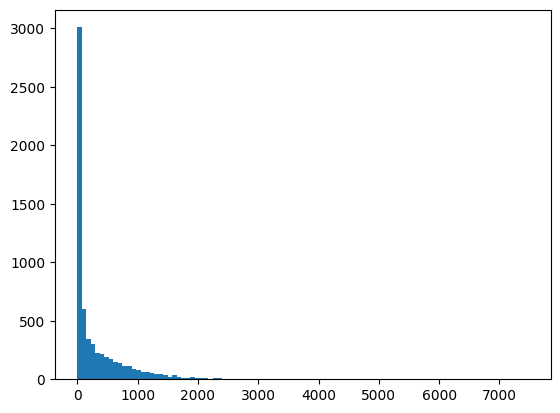

In [16]:
# Гистограмма распределения длины текстов в обучающей выборке
seq_len = [len(x) for x in x_train]
plt.hist(seq_len, 100)
plt.show()

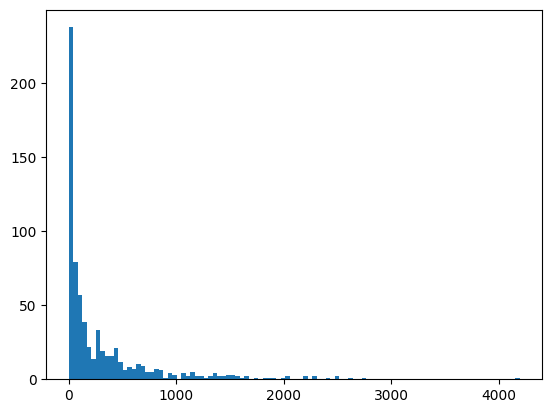

In [17]:
# Гистограмма распределения длины текстов в тестовой выборке
seq_len = [len(x) for x in x_test]
plt.hist(seq_len, 100)
plt.show()

In [19]:
# BoW
x_train_01 = tokenizer.texts_to_matrix(train_df['Текст whisper-транскрибации записи звонка'].tolist())
x_test_01 = tokenizer.texts_to_matrix(test_df['Текст whisper-транскрибации записи звонка'].tolist())
print('x_train_01.shape:', x_train_01.shape)
print(x_train_01[:20])
print()
print('x_test_01.shape:', x_test_01.shape)
print(x_test_01[:20])

x_train_01.shape: (6233, 35000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]

x_test_01.shape: (691, 35000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [20]:
# Разделение на обучающую и проверочную выборки
x_train, x_val, x_train_01, x_val_01, y_train, y_val = train_test_split(x_train,
                                                                        x_train_01,
                                                                        y_train,
                                                                        test_size=0.2,
                                                                        random_state=42,
                                                                        stratify=y_train)

In [21]:
# Сохраняем x_train в pkl
with open(preprocessed_data_path + 'x_train.pkl', 'wb') as f:
  pkl.dump(x_train, f)

# Сохраняем x_val в pkl
with open(preprocessed_data_path + 'x_val.pkl', 'wb') as f:
  pkl.dump(x_val, f)

# Сохраняем x_test в pkl
with open(preprocessed_data_path + 'x_test.pkl', 'wb') as f:
  pkl.dump(x_test, f)

In [22]:
# Сохраняем x_train_01 в pkl
with open(preprocessed_data_path + 'x_train_01.pkl', 'wb') as f:
  pkl.dump(x_train_01, f)

# Сохраняем x_val_01 в pkl
with open(preprocessed_data_path + 'x_val_01.pkl', 'wb') as f:
  pkl.dump(x_val_01, f)

# Сохраняем x_test_01 в pkl
with open(preprocessed_data_path + 'x_test_01.pkl', 'wb') as f:
  pkl.dump(x_test_01, f)

In [23]:
# Сохраняем y_train в pkl
with open(preprocessed_data_path + 'y_train.pkl', 'wb') as f:
  pkl.dump(y_train, f)

# Сохраняем y_val в pkl
with open(preprocessed_data_path + 'y_val.pkl', 'wb') as f:
  pkl.dump(y_val, f)

# Сохраняем y_test в pkl
with open(preprocessed_data_path + 'y_test.pkl', 'wb') as f:
  pkl.dump(y_test, f)

## Нейронная сеть на текстовых данных

In [32]:
# Коллбэк
save_best_collback = ModelCheckpoint(model_path + 'model_BoW.x',
                                     monitor='val_accuracy',
                                     verbose=1,
                                     mode='max',
                                     save_best_only=True)

In [27]:
# Создание архитектуры нейронной сети
model = Sequential()
model.add(Dense(500, input_dim=VOCAB_SIZE, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

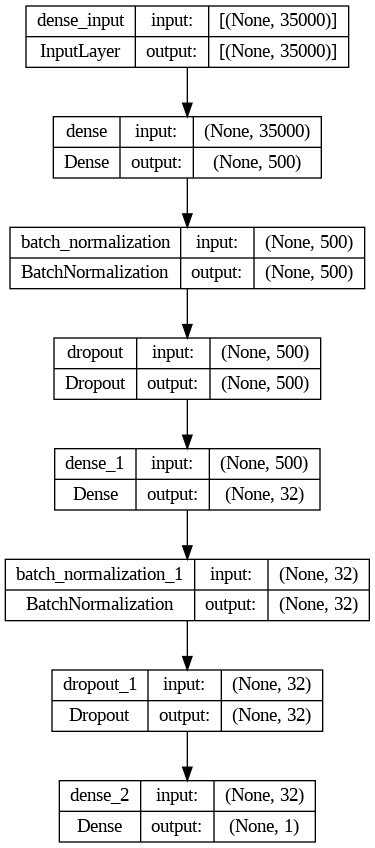

In [28]:
# Архитектуры нейронной сети
plot_model(model, show_shapes=True)

In [33]:
# Компиляция и обучение модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model.fit(x_train_01,
                     y_train,
                     epochs=15,
                     batch_size=32,
                     validation_data=(x_val_01, y_val),
                     callbacks=save_best_collback,
                     shuffle=True)

Epoch 1/15
156/156 [==============================] - ETA: 0s - loss: 0.1751 - accuracy: 0.9428
Epoch 1: val_accuracy improved from -inf to 0.89976, saving model to /content/drive/MyDrive/media108.ru/Новички/Модели/model_BoW.x
156/156 [==============================] - 53s 333ms/step - loss: 0.1751 - accuracy: 0.9428 - val_loss: 0.3088 - val_accuracy: 0.8998
Epoch 2/15
156/156 [==============================] - ETA: 0s - loss: 0.1302 - accuracy: 0.9609
Epoch 2: val_accuracy improved from 0.89976 to 0.90377, saving model to /content/drive/MyDrive/media108.ru/Новички/Модели/model_BoW.x
156/156 [==============================] - 56s 361ms/step - loss: 0.1302 - accuracy: 0.9609 - val_loss: 0.2901 - val_accuracy: 0.9038
Epoch 3/15
156/156 [==============================] - ETA: 0s - loss: 0.1064 - accuracy: 0.9683
Epoch 3: val_accuracy did not improve from 0.90377
156/156 [==============================] - 58s 371ms/step - loss: 0.1064 - accuracy: 0.9683 - val_loss: 0.2663 - val_accuracy: 0

In [34]:
# Компиляция и дообучение модели нейронной сети
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(x_train_01,
                     y_train,
                     epochs=15,
                     batch_size=32,
                     validation_data=(x_val_01, y_val),
                     callbacks=save_best_collback,
                     shuffle=True)

Epoch 1/15
156/156 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9932
Epoch 1: val_accuracy did not improve from 0.90377
156/156 [==============================] - 52s 318ms/step - loss: 0.0341 - accuracy: 0.9932 - val_loss: 0.3457 - val_accuracy: 0.8974
Epoch 2/15
156/156 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9936
Epoch 2: val_accuracy did not improve from 0.90377
156/156 [==============================] - 50s 322ms/step - loss: 0.0352 - accuracy: 0.9936 - val_loss: 0.3476 - val_accuracy: 0.8966
Epoch 3/15
156/156 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9936
Epoch 3: val_accuracy did not improve from 0.90377
156/156 [==============================] - 59s 377ms/step - loss: 0.0346 - accuracy: 0.9936 - val_loss: 0.3419 - val_accuracy: 0.8925
Epoch 4/15
156/156 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9936
Epoch 4: val_accuracy did not improve from 0.90377
156/156 [=

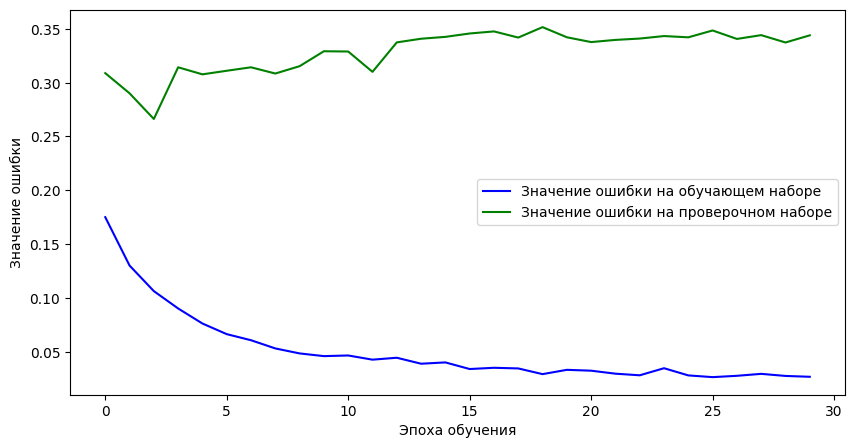

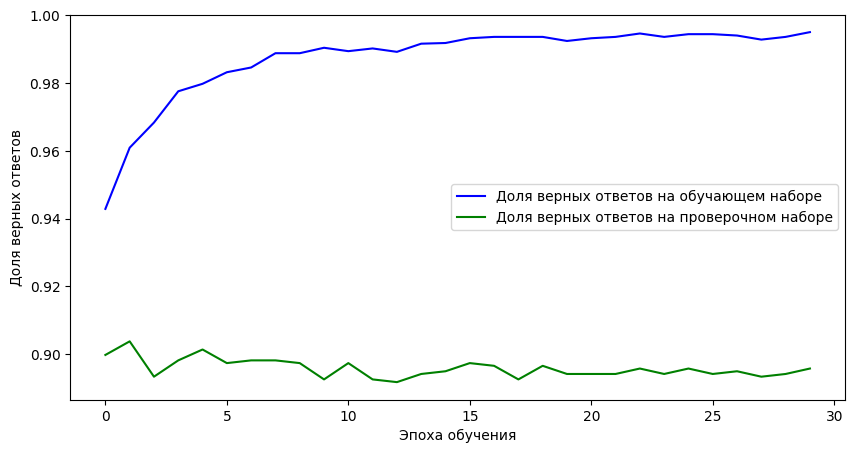

In [37]:
# График ошибки
plt.figure(figsize = (10, 5))
plt.plot(history1.history['loss']     + history2.history['loss'],     label='Значение ошибки на обучающем наборе', color='b')
plt.plot(history1.history['val_loss'] + history2.history['val_loss'], label='Значение ошибки на проверочном наборе', color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

# График доли верных ответов
plt.figure(figsize = (10, 5))
plt.plot(history1.history['accuracy']     + history2.history['accuracy'],     label='Доля верных ответов на обучающем наборе', color='b')
plt.plot(history1.history['val_accuracy'] + history2.history['val_accuracy'], label='Доля верных ответов на проверочном наборе', color='g')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [38]:
model.save(model_path + 'model_BoW.keras')

## Тест

In [49]:
# Загружаем модель с лучшими весами
model = load_model(model_path + 'model_BoW.x')

### Обучающая выборка

In [50]:
# Предсказание для обучающей выборки
y_pred = model.predict(x_train_01, batch_size=x_train_01.shape[0])

1/1 [==============================] - 3s 3s/step


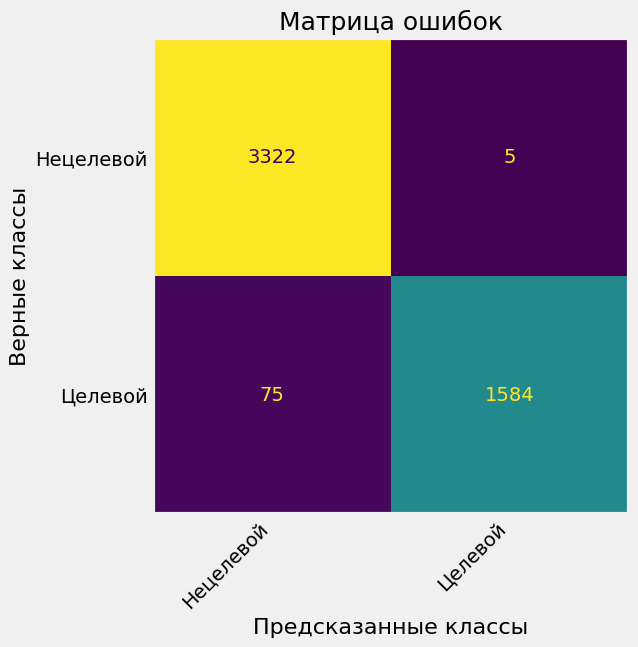

In [51]:
# Построение матрицы ошибок
cm = confusion_matrix(y_train, np.rint(y_pred))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_LIST)
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [53]:
# Отчёт классификации
print(classification_report(y_train, np.rint(y_pred)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3327
           1       1.00      0.95      0.98      1659

    accuracy                           0.98      4986
   macro avg       0.99      0.98      0.98      4986
weighted avg       0.98      0.98      0.98      4986



### Проверочная выборка

In [54]:
# Предсказание для проверочной выборки
y_pred = model.predict(x_val_01, batch_size=x_val_01.shape[0])

1/1 [==============================] - 1s 1s/step


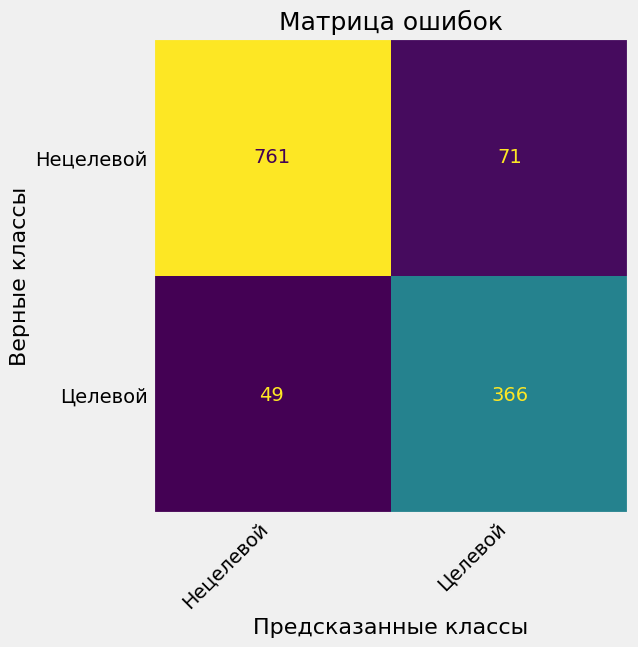

In [55]:
# Построение матрицы ошибок
cm = confusion_matrix(y_val, np.rint(y_pred))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_LIST)
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [56]:
# Отчёт классификации
print(classification_report(y_val, np.rint(y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       832
           1       0.84      0.88      0.86       415

    accuracy                           0.90      1247
   macro avg       0.89      0.90      0.89      1247
weighted avg       0.91      0.90      0.90      1247



### Тестовая выборка

In [59]:
# Предсказание для тестовой выборки
y_pred = model.predict(x_test_01, batch_size=x_test_01.shape[0])

1/1 [==============================] - 1s 736ms/step


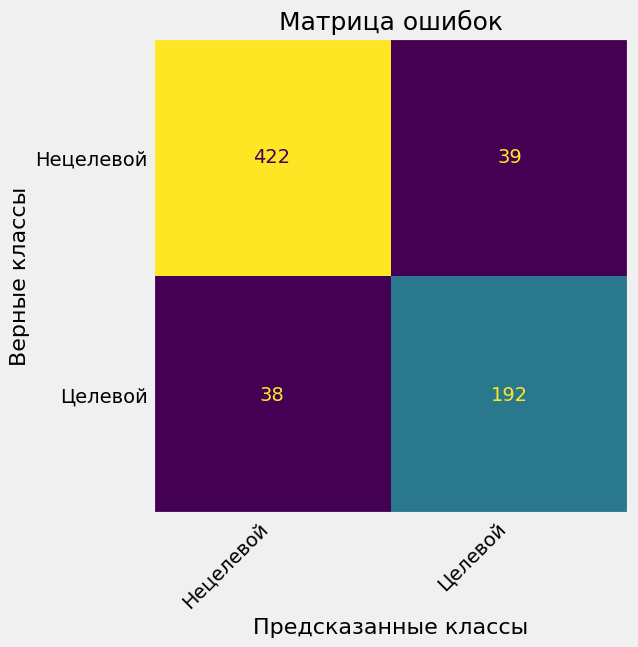

In [60]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, np.rint(y_pred))

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_LIST)
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(False)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [62]:
# Отчёт классификации
print(classification_report(y_test, np.rint(y_pred)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       461
           1       0.83      0.83      0.83       230

    accuracy                           0.89       691
   macro avg       0.87      0.88      0.87       691
weighted avg       0.89      0.89      0.89       691

